# Reading NIH data file
Initially, we need to load the data so we are able to look more into it.

In [1]:
import pandas as pd

dfAfrica = pd.read_csv("africa.csv", encoding="utf-8-sig")
dfAmericas = pd.read_csv("americas.csv", encoding="utf-8-sig")
dfEMed = pd.read_csv("mediterranean.csv", encoding="utf-8-sig")
dfEurope = pd.read_csv("europe.csv", encoding="utf-8-sig")
dfSEAsia = pd.read_csv("asia.csv", encoding="utf-8-sig")
dfWPacific = pd.read_csv("pacific.csv", encoding="utf-8-sig")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

print result.head()

               GHO PUBLISHSTATE  YEAR REGION    AGEGROUP   SEX  Display Value  \
0  LIFE_0000000033    PUBLISHED  1990    AFR  AGE100PLUS  BTSX           60.0   
1  LIFE_0000000035    PUBLISHED  2013    AFR    AGE85-89  BTSX            4.1   
2  LIFE_0000000035    PUBLISHED  2000    AFR    AGE55-59  BTSX           18.8   
3  LIFE_0000000032    PUBLISHED  2012    AFR    AGE45-49  FMLE         3411.0   
4  LIFE_0000000035    PUBLISHED  1990    AFR    AGE25-29   MLE           38.8   

      Numeric  Low  High  Comments  
0    60.01235  NaN   NaN       NaN  
1     4.14085  NaN   NaN       NaN  
2    18.76440  NaN   NaN       NaN  
3  3410.96100  NaN   NaN       NaN  
4    38.79806  NaN   NaN       NaN  


We got data. Next step is cleaning certain columns, including:
AGEGROUP, SEX, GHO (values for specific metrics, explained below), and we drop PUBLISHSTATE, Low (empty), High (also empty), Comments, and Display Value (rounded Numeric column).

In [2]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100, 95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 
                             45, 40, 35, 30, 25, 20, 15, 10, 5, 1, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)

Meanings of values in GHO column:

29  nMx - age-specific death rate between ages x and x+n

30  nqx - probability of dying between ages x and x+n

31  lx - number of people left alive at age x

32  ndx - number of people dying between ages x and x+n

33  nLx - person-years lived between ages x and x+n

34  Tx - person-years lived above age x

35  ex - expectation of life at age x

In [3]:
cleanData(result)
print result.head()

   GHO  YEAR REGION  AGEGROUP  SEX     Numeric
0   33  1990    AFR       100    2    60.01235
1   35  2013    AFR        85    2     4.14085
2   35  2000    AFR        55    2    18.76440
3   32  2012    AFR        45    1  3410.96100
4   35  1990    AFR        25    0    38.79806


And that is what our data now looks like. Next step, graphing stuff!

In [4]:
import matplotlib as mpl
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


This data exploration focuses on looking into 31 and 32 of the GHO column. An example of what it looks like is found using groupby.mean()

In [5]:
result.groupby(['GHO', 'REGION', 'YEAR', 'AGEGROUP', 'SEX']).mean()

Numeric
GHO REGION YEAR AGEGROUP SEX          
29  AFR    1990 0.5      0     0.12220
                         1     0.10310
                         2     0.11275
                1.0      0     0.02051
                         1     0.01964
                         2     0.02008
                5.0      0     0.00678
                         1     0.00657
                         2     0.00667
                10.0     0     0.00347
                         1     0.00344
                         2     0.00345
                15.0     0     0.00435
                         1     0.00388
                         2     0.00412
                20.0     0     0.00643
                         1     0.00494
                         2     0.00568
                25.0     0     0.00748
                         1     0.00618
                         2     0.00683
                30.0     0     0.00828
                         1     0.00698
                         2     0.00762
                35.0     0     0.00956
                         1     0.00801
                         2     0.00878
                40.0     0     0.01135
                         1     0.00906
                         2     0.01019
...                                ...
35  WPR    2013 55.0     0    23.19104
                         1    26.47949
                         2    24.81079
                60.0     0    19.13731
                         1    22.15896
                         2    20.64060
                65.0     0    15.42357
                         1    18.12318
                         2    16.78740
                70.0     0    12.09318
                         1    14.41054
                         2    13.29094
                75.0     0     9.21246
                         1    11.12355
                         2    10.23840
                80.0     0     6.80038
                         1     8.31782
                         2     7.66147
                85.0     0     4.97558
                         1     6.14232
                         2     5.69064
                90.0     0     3.52535
                         1     4.43578
                         2     4.13592
                95.0     0     2.75148
                         1     3.43853
                         2     3.26290
                100.0    0     2.31193
                         1     2.70181
                         2     2.63238

[11088 rows x 1 columns]

And below, we have a plot showing the 32 columns (blue) compared to the 31 columns (green). The scale on the Y-axis is in 1,000s. (this is wrong and broken, leaving to show iterations)

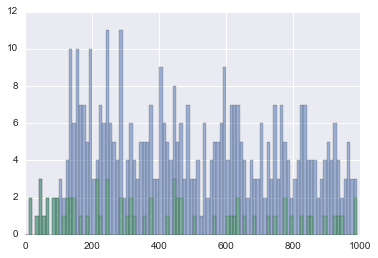

In [6]:
plt.hist(result[result.GHO == 32].Numeric, bins = np.arange(0, 1000, 10), alpha = 0.5)
plt.hist(result[result.GHO == 31].Numeric, bins = np.arange(0, 1000, 10), alpha = 0.5)

plt.show()

So this graph does not show us much, but that is mainly because we are not cleaning the data in a fashion that helps us show our values. To look more into a proper graph, first we need to isolate the 31 and 32 values of GHO, which is shown as an example below.

In [10]:
result[result.GHO == 32].Numeric

3        3410.96100
6        5931.23300
14       2467.86900
15      12381.15000
23         40.27283
25       4613.28800
29       5567.51200
30       1684.05600
36       3716.07400
48       2532.80100
58       2710.27600
59       6648.78300
85       8175.62500
88      10983.35000
96      10085.40000
103      3621.95000
105      8674.79000
127      4011.45800
130      2697.85400
131      1477.17700
135      3826.86900
143      6916.23700
148      1368.18700
160      1906.34600
165      8140.53700
175      1902.61100
180      1564.02100
184      3560.99500
196      5730.13200
202        17.46107
           ...     
1662    15113.25000
1664     5946.44400
1667     1034.14600
1685      155.37440
1694     1459.08900
1712     2495.78100
1713     2878.74300
1721      266.25010
1727      686.09470
1731      299.80070
1735     4337.61100
1743     3757.76800
1745     6282.17400
1748     2616.82200
1749      313.51610
1760     1126.08700
1763     3742.01500
1769      243.89900
1774     7811.85200


So the Numeric column will give us the values we care about, however we need to sort them based on age to show any meaningful information (with the idea that the number of people alive will descend as age increases). Below, we isolate the values for both sexes, then sort the `AGEGROUP` column for both 31 and 32.

In [20]:
bothSex = result[result.SEX == 2]
GHO31 = bothSex[bothSex.GHO == 31]
GHO31.sort_index(by = ["AGEGROUP"], ascending = True, inplace = True)

GHO32 = bothSex[bothSex.GHO == 32]
GHO32.sort_index(by = ["AGEGROUP"], ascending = True, inplace = True)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


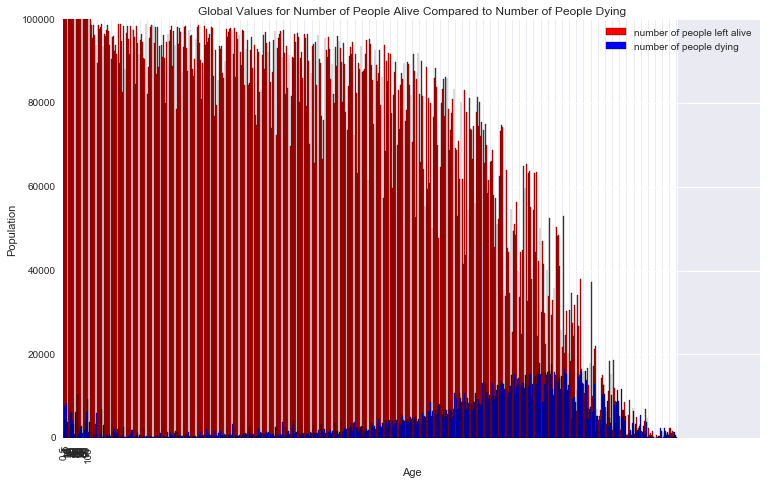

In [30]:
# graph setup
N = 528
ind = np.arange(N)
width = .75

fig, ax = plt.subplots()
rects1 = ax.bar(ind, GHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, GHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Global Values for Number of People Alive Compared to Number of People Dying")

plt.show()

That's a lot of data that shows a very general trend, but we can refine this into a more reasonable graph by breaking it up into each specific region.

In [27]:
# Africa only
africaGHO31 = GHO31[GHO31.REGION == "AFR"]
africaGHO32 = GHO32[GHO32.REGION == "AFR"]
print africaGHO31.head()

      GHO  YEAR REGION  AGEGROUP  SEX    Numeric
1112   31  2000    AFR       0.5    2  100000.00
632    31  2012    AFR       0.5    2  100000.00
329    31  1990    AFR       0.5    2  100000.00
758    31  2013    AFR       0.5    2  100000.00
1165   31  2013    AFR       1.0    2   93889.38


Good. Sorted based on age from the previous column data, but now we are only looking at a specific region. Let's make new graphs for each region now, starting with Africa:

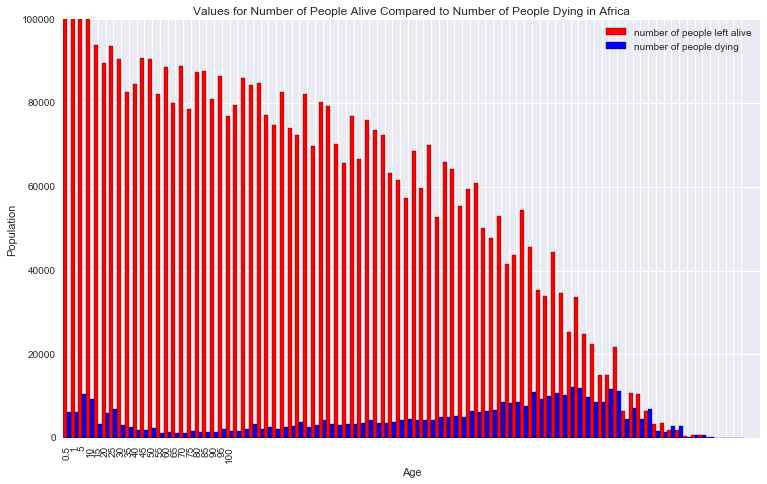

In [37]:
N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, africaGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, africaGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Africa")

plt.show()

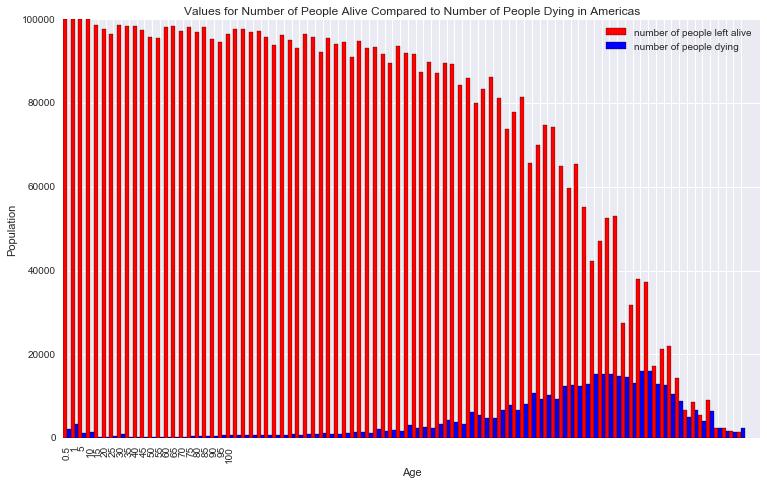

In [39]:
americaGHO31 = GHO31[GHO31.REGION == "AMR"]
americaGHO32 = GHO32[GHO32.REGION == "AMR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, americaGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, americaGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Americas")

plt.show()

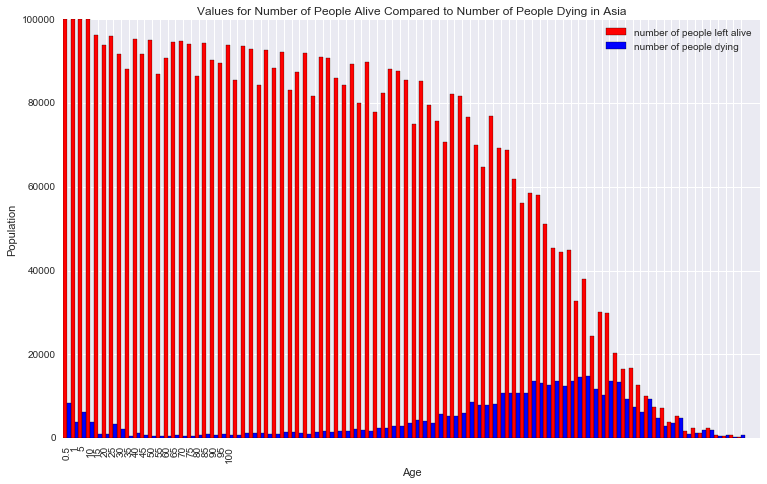

In [40]:
asiaGHO31 = GHO31[GHO31.REGION == "SEAR"]
asiaGHO32 = GHO32[GHO32.REGION == "SEAR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, asiaGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, asiaGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Asia")

plt.show()

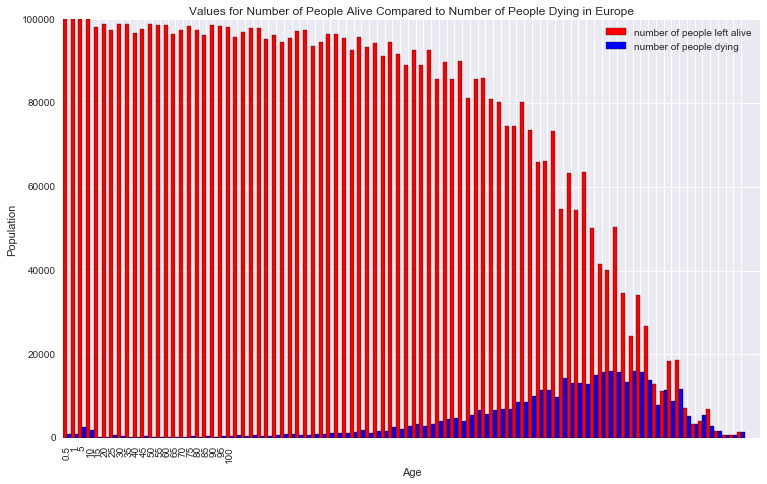

In [41]:
europeGHO31 = GHO31[GHO31.REGION == "EUR"]
europeGHO32 = GHO32[GHO32.REGION == "EUR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, europeGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, europeGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Europe")

plt.show()

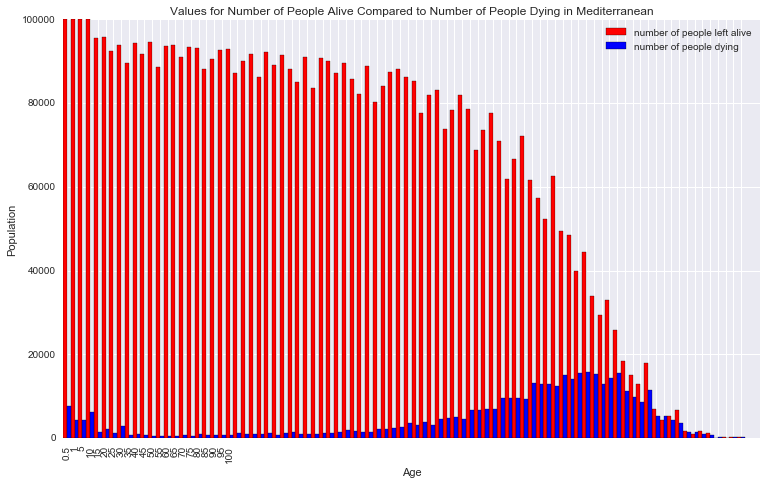

In [42]:
medGHO31 = GHO31[GHO31.REGION == "EMR"]
medGHO32 = GHO32[GHO32.REGION == "EMR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, medGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, medGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Mediterranean")

plt.show()

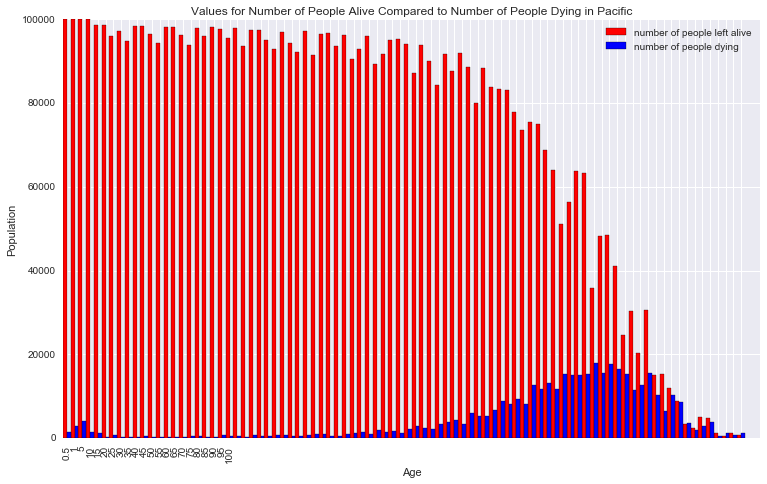

In [43]:
pacificGHO31 = GHO31[GHO31.REGION == "WPR"]
pacificGHO32 = GHO32[GHO32.REGION == "WPR"]

N = 88
ind = np.arange(N)
width = .50

fig, ax = plt.subplots()
rects1 = ax.bar(ind, pacificGHO31.Numeric.values, width, color = 'r')
rects2 = ax.bar(ind + width, pacificGHO32.Numeric.values, width, color = 'b')
ax.set_ylabel("Population")
ax.set_xlabel("Age")
ax.set_xticks(ind + width)
labels = ax.set_xticklabels(["0.5", "1", "5", "10", "15", "20", "25", "30", "35", "40", 
                             "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", 
                             "95", "100"])
ax.legend((rects1[0], rects2[0]), ('number of people left alive', 'number of people dying'))
fig.set_size_inches(12.5, 7.5)
plt.setp(labels, rotation = 90)
ax.set_title("Values for Number of People Alive Compared to Number of People Dying in Pacific")

plt.show()

Good. Now we have plots for each individual region, and we can now pull some insights; from a quick glance we can see that Africa has a fairly constant decline in number of people alive that becomes more steep towards the higher age values. The Americas and Europe regions have a very steep decline in people alive in later years, but the number of people dying otherwise stays very low. We can relate these trends toward infrastructure, especially health care facilities, in each region. 

We've also noticed the periodic skipping every three red or blue bars. This is because we kept all four sample years in each graph; the periodic jumps in population between two bars is actually the result of jumping between sampling years in age groups. To address this apparent difference in years, we decided to break down the data furthur and look at how year and region interact with population statistics. 